In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Sử dụng CornerHarris

In [2]:
def showImage(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [3]:
filename_arr =['chessboard.jpg',"chess.png","chess1.jpg"]


In [10]:
def CornerHarris(img):
    #img = cv.imread(file_name)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,5,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv.dilate(dst,None)
    h,w=img.shape[1::-1]
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.01*dst.max()]=[0,0,255]
    cv.putText(img,"Detect Corner",(10, 25),cv.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)
    showImage(img)
    

Kết quả chạy với bức ảnh 1


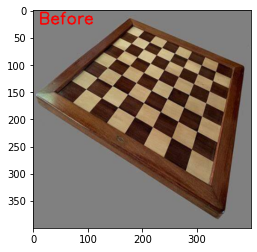

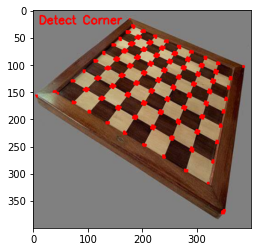

Kết quả chạy với bức ảnh 2


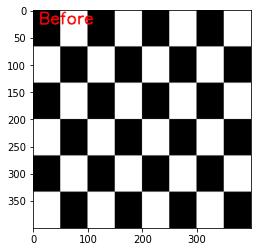

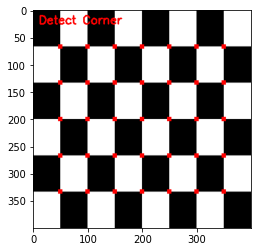

Kết quả chạy với bức ảnh 3


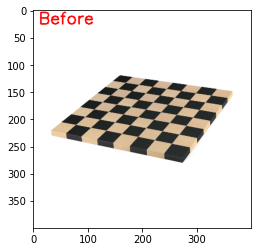

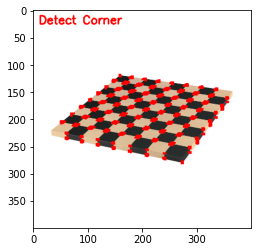

In [12]:
count=0
for file_name in filename_arr:
    count+=1
    print("Kết quả chạy với bức ảnh",count)
    img=cv.imread(file_name)
    img=cv.resize(img,(400,400))
    before_img = img.copy()
    h,w=before_img.shape[1::-1]
    cv.putText(before_img,"Before",(10, 25),cv.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    showImage(before_img)
    CornerHarris(img)

# Sử dụng SubPixel

In [13]:
def SubPixel(img):
    #img = cv.imread(file_name)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    # find Harris corners
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,10,3,0.04)
    dst = cv.dilate(dst,None)
    ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)
    # find centroids
    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
    # define the criteria to stop and refine the corners
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    # Now draw them
    res = np.hstack((centroids,corners))
    res = np.int0(res)
    img[res[:,1],res[:,0]]=[0,0,255]
    img[res[:,3],res[:,2]] = [0,255,0]
    showImage(img)

Kết quả chạy với bức ảnh 1


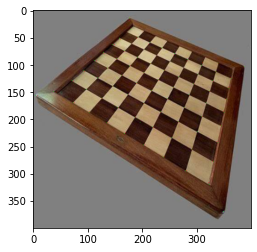

Kết quả chạy với bức ảnh 2


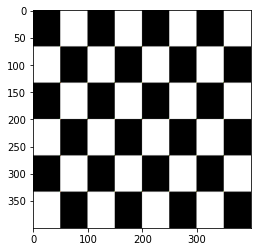

Kết quả chạy với bức ảnh 3


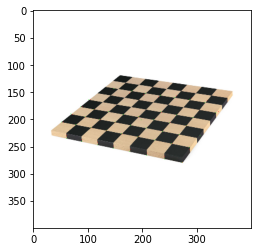

In [14]:
count=0
for file_name in filename_arr:
    count+=1
    print("Kết quả chạy với bức ảnh",count)
    img=cv.imread(file_name)
    img=cv.resize(img, (400, 400))
    before_img = img.copy()
    h,w=before_img.shape[1::-1]
    # cv.putText(before_img,"Before",(10, 25),cv.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    # showImage(before_img)
    SubPixel(img)